# <U>**Trabajo Final - Data Science I: Fundamentos para la Ciencia de Datos - Coderhouse**</U>
## Alumna: Ana Paula Alvarez Pringles
### **_Comisión: 60935_**
### **_Porfesor: Jorge Ruiz_**

#**Determinación del precio de diamantes**

##Abstract

La tasación de joyas establece el valor de una pieza. Esta puede verse influenciada no solo por el  material a ser tasado sino también por la complejidad de la pieza, su fabricación, diseño o antiguedad pueden ser factores importantes a tener en cuenta.

Este proyecto se encuentrá orientado a optimizar el proceso de tasación dentro de la industria de los diamantes.

Para este proyecto se utilizó un dataset poveniente de kaggle.com. Cuenta con 54.000 registros de diferentes gemas con sus precios y caracterizadas por sus dimensiones y distintas variables cualitativas indicadoras de calidad.

Podemos decir que existe una relación entre el precio y el peso en quilates, y, que este último tiene relacion a su vez con el resto de las medidas físicas (ancho, alto y profundidad). Pero al contrario de lo esperado, la claridad de la gema si sería una variable involucrada en el precio de los diamantes, así como tambien el color de la gema (tal vez en menor medida), pero no así la calidad del corte. Esto fue llevado a cabo con mejor desempeño mediante una regresión lineal múltiple.

##Objetivo
Estimar el precio de las gemas de acuerdo a las caracteristicas físicas mediante un modelo de regresión.

##Contexto comercial
Este proyecto está orientado a pequeños o medianos locales, que tal vez recién comienzan en el rubro, a facilitar el proceso mencionado ante la falta ya sea de personal con experiencia o instrumentos correspondientes para una adecuada determinación del precio.

Este análisis tiene como objetivo complementar el proceso de tasación de gemas, ayudando a su simplificación, aproximando el precio de las mismas mediante diferentes características.

##Hipótesis:
* El precio se encuentra determinado pricipalmente por el tamaño 'carat' de la gema y menos por la claridad de la misma. es decir por las dimensionas más que por un atributo de calidad.
* De las variables de calidad física, influye más en el precio la calidad del corte que el color de la gema.

# Descripción del data set

Este data set incluye 10 variables que describen los diamantes, como el precio y otros atributos físicos.

**Atributos físicos:**
* Price: precio en dólares.
* Carat: es una medida que especifica el peso de un diamante.
* Cut: indica la calidad del corte del diamante. Las categorías de peor a mejor son: Fair, Good, Very Good, Premium, Ideal.
* Color: de J (peor) a D (mejor). Los colores van del incoloro al amarillo claro o marrón claro.
* Clarity: Indica cuanlimpio es la gema. Las categorias de peor a mejor son:I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF.

**Dimensiones:**
* x largo en mm.
* y ancho en mm.
* z profundidad en mm.

Depth / Profundidad (%) = z / media(x, y)

Table width / Ancho de la cara plana relativo a la parte mas ancha (%).

Estas dos últimas variables afectan la forma en que refleja la luz en el diamante.

![texto del enlace](https://drive.google.com/uc?id=1irNvAUer3dXiJLBAdTN2JyObTCv8rp1n)

#Carga de librerías, exploración inicial del dataset y descripción de las variables.

In [213]:
# manejo de datos
import pandas as pd
import numpy as np

# visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [214]:
# leer los datos
df = pd.read_csv("diamonds.csv", delimiter=";",index_col=[0])

# primeras 5 filas
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [215]:
# Estructura del ds
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


(53940, 10)

###Este data set esta compuesto por 3 variables cualitativas y 7 cuantitativas.
Transformamos estas últimas a tipo 'Category'


---


**Cualitativas:**
 * Corte (cut) - Ordinal
 * Color - Ordinal
 * Claridad (clarity) - Ordinal

**Cuantitativas**
 * Carat - Contínua
 * % Profundidad - Contínua
 * Ancho de la cara plana - Contínua
 * x (largo) - Contínua
 * y (ancho) - Contínua
 * z (profundidad) - Contínua

 * Precio - Discreta

In [216]:
#Modificamos las variables 'object' a 'category'            ######  DUDA: esto coresponde para estas que son ordinales e importa el orden? nose ocmo ordenarlas despues en los gráficos
df['cut'] = df['cut'].astype('category')
df['clarity'] = df['clarity'].astype('category')
df['color'] = df['color'].astype('category')
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

#EDA


*   Exploramos la existencia de NaN y de 0 verdaderos.
*   Realizamos uan primera exploración de la distribución de las variables
*   Calculamos el coeficiente de variación para cada columna
*   Realizamos diversos gráficos para explorar la relación entre las variables.

Cada apartado contiene su explicación o interpretación correspondiente.

In [140]:
# contar el numero de valores que son na por columnas
print(df.isnull().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [146]:
# contar el numero de valores que son 0 por columnas
nun_missing = (df[['carat', 'cut','color', 'clarity','depth', 'table','price', 'x','y','z']] == 0).sum()
print(nun_missing)
#en x, y z hay 0

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


Observamos que hay algunos valores 0 en las columnas de las dimensiones. En este caso, dada que la cantidad de datos en alta, estas filas con 0 no representan un gran porcentaje, las eliminaré.

In [142]:
#eliminar filas con 0

df=df.drop(df.index[df["x"]==0], axis=0)
df=df.drop(df.index[df["z"]==0], axis=0)
df=df.drop(df.index[df["y"]==0], axis=0)
df.shape

(53920, 10)

In [14]:
# EDA
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


En cuanto a la distribución de las variables, algunas como depth, table, x, y ,z parecen ser bastante simétricas dada la poca diferencia entre su media y su mediana (50%). Podremos observar esto en más detalle más adelante mediante histogramas.

Por otro lado, otras variables como carat y price parecen ser asimétricas estando sesgadas a la derecha, con una media mayor a la mediana.

Para ver esto también podemos calcular el coeficiente de variación y evaluar cuan homogéneos son los datos y si la media es representativa de ellos.

Se observan valores atípicos en los máximos de z e y, pero al no saber si es uno solo o varios, lo conservo y luego con la exploración gráfica decido.

In [15]:
#Ubicamos en que registro esta el valor.
df.loc[df['z']==31.8]

,carat,cut,color,clarity,depth,table,price,x,y,z
48411,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.8


In [16]:
#Ubicamos en que registro esta el valor.
df.loc[df['y']==31.8]

,carat,cut,color,clarity,depth,table,price,x,y,z
49190,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.8,5.12


En este caso, analizando los valores parece ser un error de tipeo y colocación de la coma.  Se podría corregir estos registros.

In [ ]:
#df.loc[48411,'z']=3.18

In [ ]:
#df.loc[24068,'y']=5.89

In [17]:
# Calcular el coeficiente de variación para cada columna          ##### esto se puede pedir en una sola linea de codigo? bajo un mismo nombre y pedir imprimir solo eso? en vez de crear una variable para cada uno?
coef_var_carat = (df["carat"].std() / df['carat'].mean() *100).round(1)
coef_var_price = (df["price"].std() / df['price'].mean() *100).round(1)
coef_var_depth = (df["depth"].std() / df['depth'].mean() *100).round(1)
coef_var_table = (df["table"].std() / df['table'].mean() *100).round(1)
coef_var_x = (df["x"].std() / df['x'].mean() *100).round(1)
coef_var_y = (df["y"].std() / df['y'].mean() *100).round(1)
coef_var_z = (df["z"].std() / df['z'].mean() *100).round(1)

coef_var_carat, coef_var_price, coef_var_depth, coef_var_table, coef_var_x, coef_var_y, coef_var_z



(59.4, 101.4, 2.3, 3.9, 19.5, 19.9, 19.8)

Siguiendo los criterios vistos en clase (Martinez 2007), efectivamente las variables carat y price no son homogéneos y la media no seria representativa. mientras que para el resto de las variables, los valores son todos menores al 30%, siendo estos datos homogéneos.

En estos casos sería conveniente en caso de necesitar algun valor de referencia, utilizar la mediana en vez de la media.

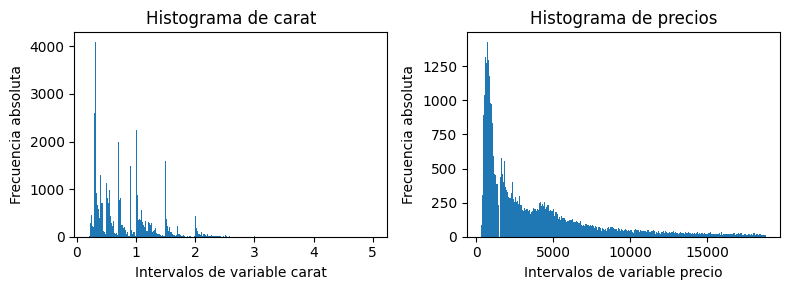

In [ ]:
#Graficamos histogramas para ver la distribución de estas variables.
fig, (ax1, ax2)=plt.subplots(1,2, figsize=(8,3))
ax1.hist(df.carat.values.flatten(),bins=400)
ax1.set_title('Histograma de carat')
ax1.set_xlabel('Intervalos de variable carat')
ax1.set_ylabel('Frecuencia absoluta')

ax2.hist(df.price.values.flatten(),bins=400)
ax2.set_title('Histograma de precios')
ax2.set_xlabel('Intervalos de variable precio')
ax2.set_ylabel('Frecuencia absoluta')

plt.tight_layout()

En estos histogramas puede verse la asimetría de estas variables.

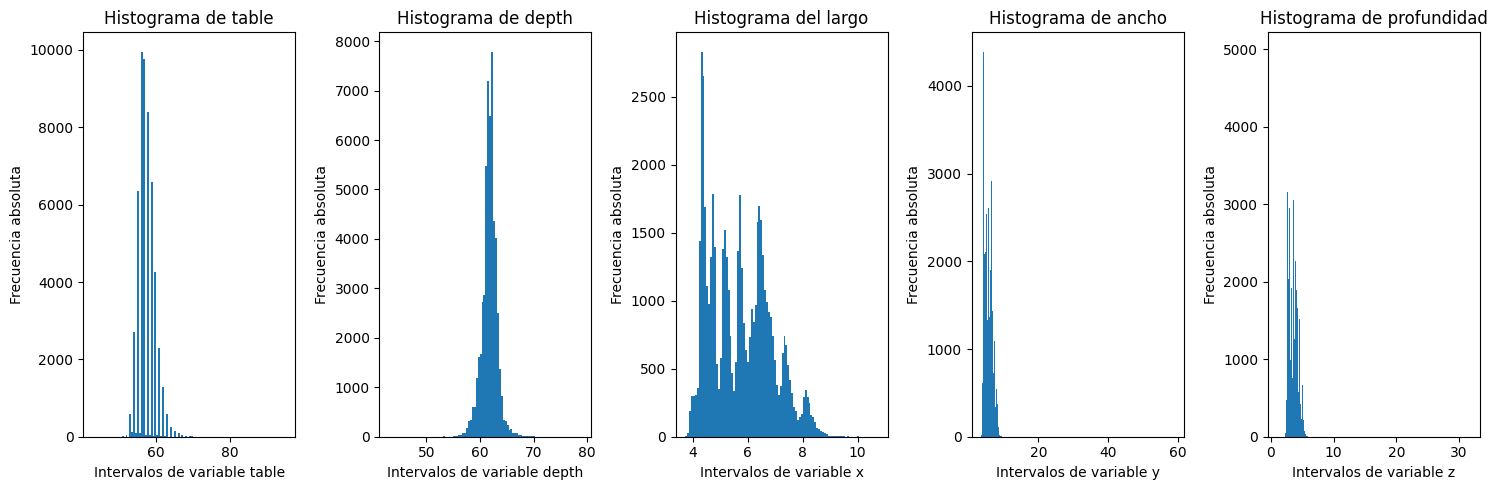

In [ ]:
#Graficamos histogramas para ver la distribución de estas variables.        #####DUDA: intente grafica en 2 filas y 3 columnas para que no queden en una misma linea pero no pude solucionar el error "ValueError: not enough values to unpack (expected 5, got 3)"
fig, (ax1, ax2, ax3, ax4, ax5)=plt.subplots(nrows=1,ncols=5, figsize=[15,5])
ax1.hist(df.table.values.flatten(),bins=100)
ax1.set_title('Histograma de table')
ax1.set_xlabel('Intervalos de variable table')
ax1.set_ylabel('Frecuencia absoluta')

ax2.hist(df.depth.values.flatten(),bins=100)
ax2.set_title('Histograma de depth')
ax2.set_xlabel('Intervalos de variable depth')
ax2.set_ylabel('Frecuencia absoluta')

ax3.hist(df.x.values.flatten(),bins=100)
ax3.set_title('Histograma del largo')
ax3.set_xlabel('Intervalos de variable x')
ax3.set_ylabel('Frecuencia absoluta')

ax4.hist(df.y.values.flatten(),bins=400)
ax4.set_title('Histograma de ancho')
ax4.set_xlabel('Intervalos de variable y')
ax4.set_ylabel('Frecuencia absoluta')

ax5.hist(df.z.values.flatten(),bins=400)
ax5.set_title('Histograma de profundidad')
ax5.set_xlabel('Intervalos de variable z')
ax5.set_ylabel('Frecuencia absoluta')

plt.tight_layout()

La variable depth parece ser la mas simétrica, algo más dificil de identificar en la variable x.
Por su lado 'table' posee algunos valores muy frecuentes que salen del tipico patrón simétrico o normal.
Respecto a z e y, el volumen general de datos posee simetría pero existen valores mas altos (outliers o datos erroneos?) que estiran la distribución a la derecha.

In [ ]:
#Ahora analicemos las variables categóricas: corte, color y claridad.
df.describe(include='category')

,cut,color,clarity
count,53920,53920,53920
unique,5,7,8
top,Ideal,G,SI1
freq,21548,11284,13063


In [ ]:
cut_values=df.cut.value_counts()
cut_values

cut
Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: count, dtype: int64

In [ ]:
color_values=df.color.value_counts()
color_values

color
G    11284
E     9797
F     9538
H     8298
D     6774
I     5421
J     2808
Name: count, dtype: int64

In [ ]:
clarity_values=df.clarity.value_counts()
clarity_values

clarity
SI1     13063
VS2     12254
SI2      9185
VS1      8170
VVS2     5066
VVS1     3654
IF       1790
I1        738
Name: count, dtype: int64

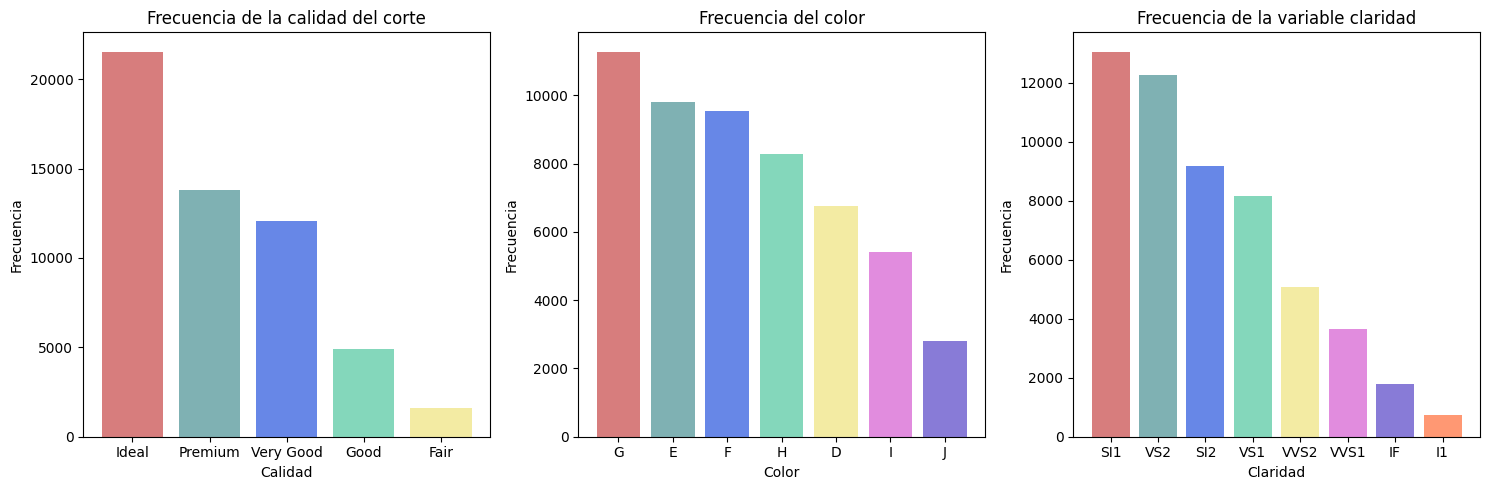

In [ ]:
color = ('indianred','cadetblue','royalblue','mediumaquamarine','khaki','orchid','slateblue','coral')

fig,(ax1, ax2, ax3) = plt.subplots(nrows=1,ncols=3,figsize=[15, 5])

ax1.bar(cut_values.index, cut_values, color=color, alpha=0.8)
ax1.set_title('Frecuencia de la calidad del corte')
ax1.set_ylabel('Frecuencia')
ax1.set_xlabel('Calidad')

ax2.bar(color_values.index, color_values, color=color, alpha=0.8)
ax2.set_title('Frecuencia del color')
ax2.set_ylabel('Frecuencia')
ax2.set_xlabel('Color')

ax3.bar(clarity_values.index, clarity_values, color=color, alpha=0.8)
ax3.set_title('Frecuencia de la variable claridad')
ax3.set_ylabel('Frecuencia')
ax3.set_xlabel('Claridad')

plt.tight_layout()

Cut: de peor a mejor son: Fair, Good, Very Good, Premium, Ideal.

Color: de J (peor) a D (mejor).

Clarity: de peor a mejor son:I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF.

**Duda general**: utilizar algún tipo de encoder para variables ordinales, o renombrarlas con algun código para entender el orden de mejor a peor?
No encontré forma de reorganizar las barras.

En el primer gráfico de barras se puede observar que la categoría de corte ideal es la más frecuente, con casi la mitad d elos registros. La siguen en orden decreciente el resto de las categorías en orden de calidad.

Respecto al color las categorías más representadas son G, E y F que corresponden a categorías medias/altas de calidad de color, es decir diamantes casi incoloros.

Hay mayor cantidad de diamantes son de nivel de claridad media a baja (primeras 4 columnas).

Text(0.5, 1.0, 'Matriz de correlación')

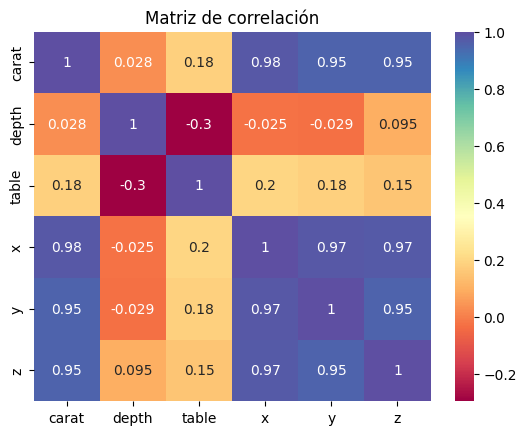

In [217]:
#Como re relacionan estas variables?
columnas_seleccionadas = df[[ 'carat', 'depth', 'table', 'x', 'y','z']]
matriz_correlacion = columnas_seleccionadas.corr()
ax = plt.axes()
sns.heatmap(matriz_correlacion, cmap='Spectral', annot=True, ax=ax)
ax.set_title('Matriz de correlación')

En esta matriz de correlación podemos observar que las variables %profundidad y table presentan baja correlación con casi todas las variables, siendo ambas calculadas con las medidas de las gemas. Tal vez puede considerarse descartarlas del análisis.

Se encuentran altas correlaciones entres Carat (el peso del diamante, en quilates), el precio (nuestra variable objetivo) y con el ancho, largo y la profundidad de la gemas, lo cual tiene sentido dado que estas últimas medidas determinan el tamaño, lo cual influye en el precio. Si bien el peso en quilates y las variables de tamaño estan relacionadas, no siempre un mismo peso en quilates tendrá el mismo precio pues depende de como este tallado el diamante (variable categorica corte).

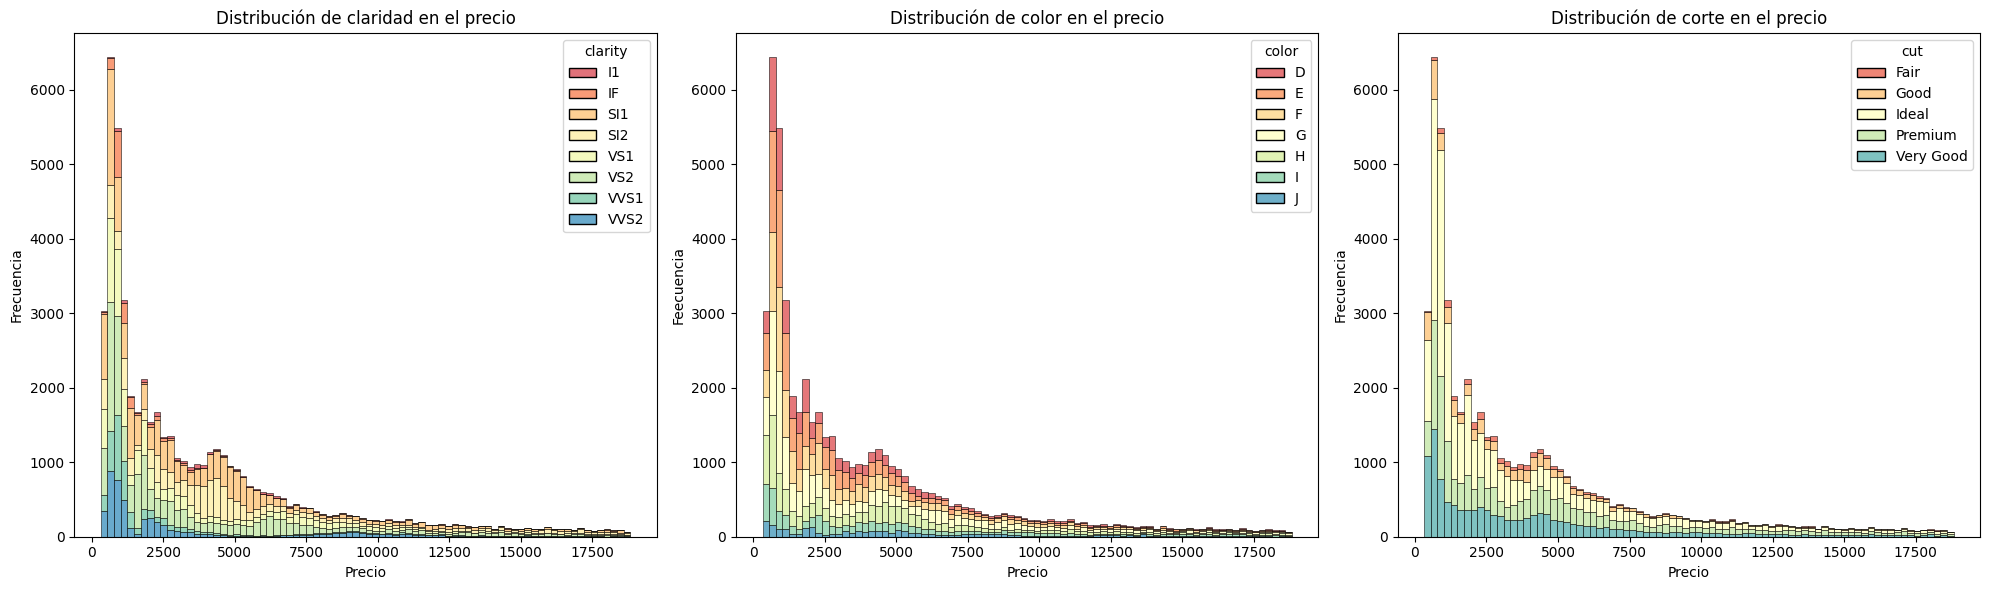

In [ ]:
f, axs = plt.subplots(1, 3, figsize=(20, 6), gridspec_kw=dict(width_ratios=[5, 5, 5]))
sns.histplot(data=df, x="price", hue="clarity", multiple="stack",palette='Spectral', ax=axs[0])
sns.histplot(data=df, x="price", hue="color", multiple="stack",palette='Spectral', ax=axs[1])
sns.histplot(data=df, x="price", hue="cut", multiple="stack",palette='Spectral', ax=axs[2])
axs[0].set_title('Distribución de claridad en el precio')
axs[1].set_title('Distribución de color en el precio')
axs[2].set_title('Distribución de corte en el precio')
axs[0].set_xlabel('Precio')
axs[1].set_xlabel('Precio')
axs[2].set_xlabel('Precio')
axs[0].set_ylabel('Frecuencia')
axs[1].set_ylabel('Feecuencia')
axs[2].set_ylabel('Frecuencia')
f.tight_layout()

Podemos observar que hay gran cantidad de diamantes de bajo precio. Con respecto a las caracteristicas de color, claridad y calidad del corte vemos que no parecen presentar relación con el precio, estando distribuidas todas las categorías en todo el rango de precio.

In [ ]:
###### me gustaria filtrar los registros de mayor precio para ver más detalle
major_prices=df.loc[df['price'] >=10000,'price']
major_prices

21928    10000
21929    10002
21930    10003
21931    10004
21932    10006
         ...  
27746    18803
27747    18804
27748    18806
27749    18818
27750    18823
Name: price, Length: 5215, dtype: int64

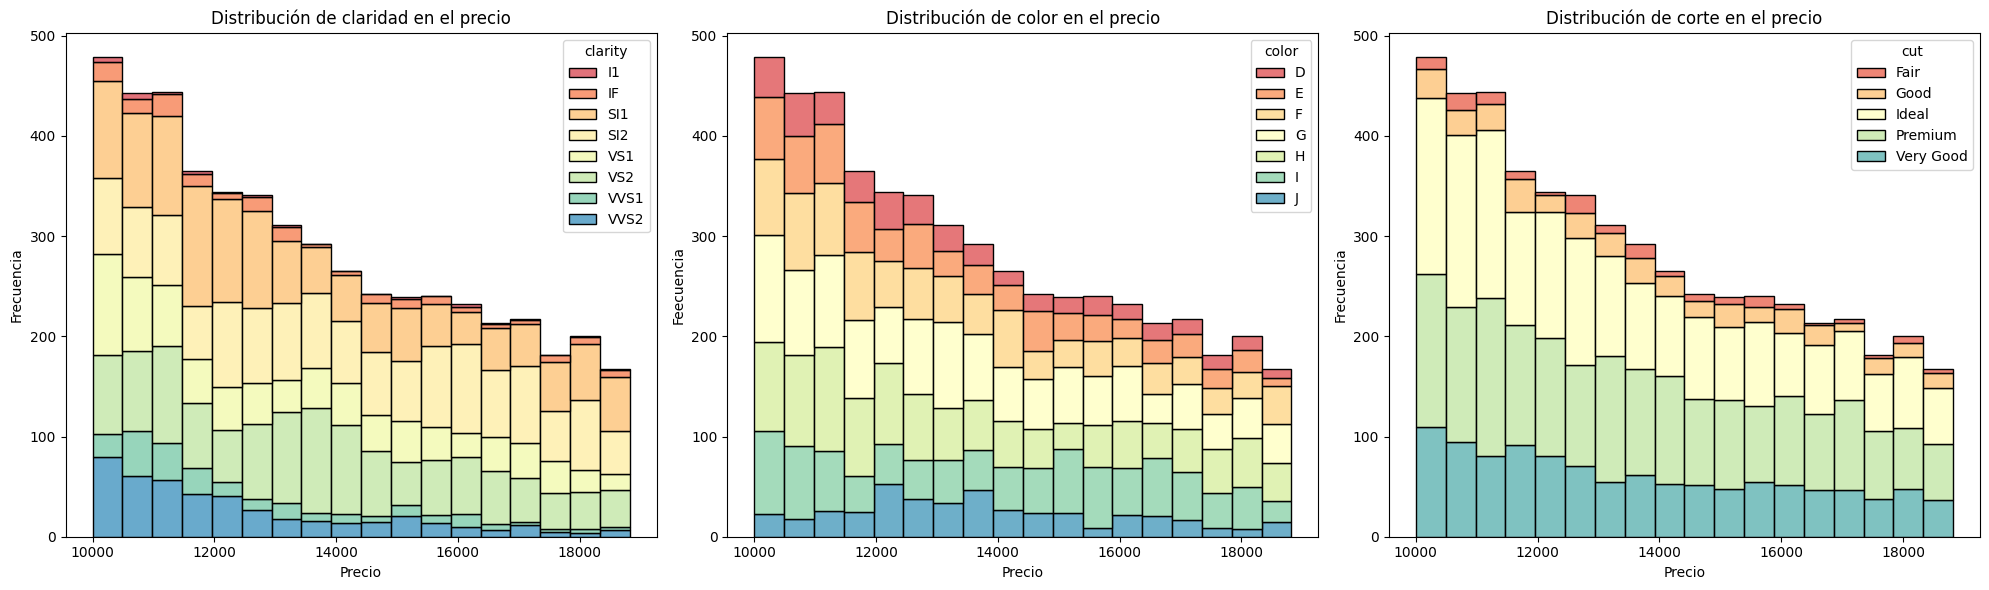

In [ ]:
f, axs = plt.subplots(1, 3, figsize=(20, 6), gridspec_kw=dict(width_ratios=[5, 5, 5]))
sns.histplot(data=df, x=major_prices, hue="clarity", multiple="stack",palette='Spectral', ax=axs[0])
sns.histplot(data=df, x=major_prices, hue="color", multiple="stack",palette='Spectral', ax=axs[1])
sns.histplot(data=df, x=major_prices, hue="cut", multiple="stack",palette='Spectral', ax=axs[2])
axs[0].set_title('Distribución de claridad en el precio')
axs[1].set_title('Distribución de color en el precio')
axs[2].set_title('Distribución de corte en el precio')
axs[0].set_xlabel('Precio')
axs[1].set_xlabel('Precio')
axs[2].set_xlabel('Precio')
axs[0].set_ylabel('Frecuencia')
axs[1].set_ylabel('Feecuencia')
axs[2].set_ylabel('Frecuencia')
f.tight_layout()

Ahora viendo más detalle, vemos que el patrón se repite para las gemas de mayor valor.

Text(0, 0.5, 'Precio en dólares')

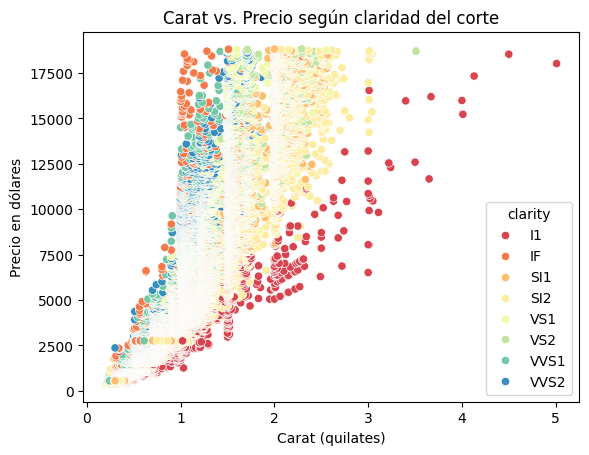

In [15]:
#creo que queda blanco por la cantidad de puntos, no lo pude arreglar
sns.scatterplot(data=df, x="carat", y="price", hue="clarity", palette='Spectral')
plt.title('Carat vs. Precio según claridad del corte')
plt.xlabel('Carat (quilates)')
plt.ylabel('Precio en dólares')

En esta gráfica podemos visualizar como interacciona la relación entre el peso en quilates con el precio, seccionado por la claridad de la gema. Vemos una relación lineal entre estas variables especialmente para la peor calidad (I1), mientras que para el resto de las calidades, en orden progresivo hasta la mejor (IF), el precio aumenta más que su peso equivalente en quilates. Entonces obtenemos que para los pesos bajos, un mismo peso en quilates presenta gemas de todas las calidades de precios progresivamente mayores. En cambio esta situación cambia para los diamantes de más peso.
También es posible observar que los diamantes de mejor calidad de claridad en general no pasan el quilate y medio aproximadamente.

Text(0, 0.5, 'Precio en dólares')

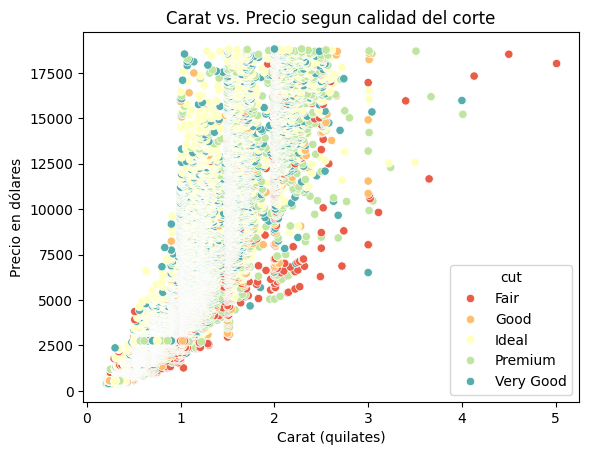

In [16]:
sns.scatterplot(data=df, x="carat", y="price", hue="cut", palette='Spectral')
plt.title('Carat vs. Precio segun calidad del corte')
plt.xlabel('Carat (quilates)')
plt.ylabel('Precio en dólares')

A diferencia de lo que sucedia con la variable 'claridad', observamos que la calidad del corte no presenta un patrón tan evidente.

Text(0, 0.5, 'Precio en dólares')

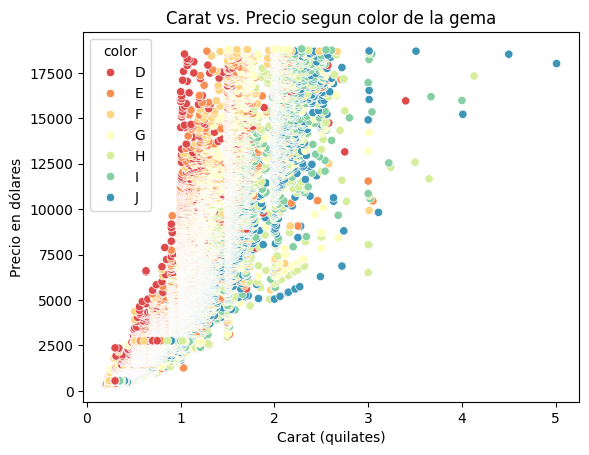

In [17]:
sns.scatterplot(data=df, x="carat", y="price", hue="color", palette='Spectral')
plt.title('Carat vs. Precio segun color de la gema')
plt.xlabel('Carat (quilates)')
plt.ylabel('Precio en dólares')

Aqui, nuevamente observamos un patrón, tal vez no tan marcado como con la variable claridad, pero siguiendo la misma lógica. Se puede identificar una relación lineal entre el peso en quilates y el precio de los diamantes, pero a medida que el color es de los conciderados 'mejores' ('D'), el precio aumenta en mayor medida que el peso en quilates.

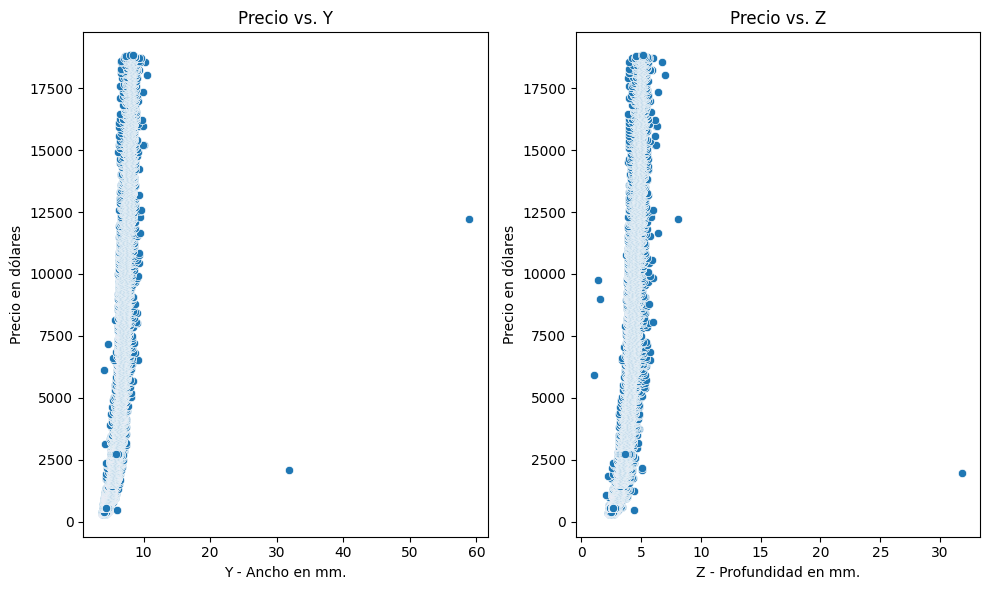

In [ ]:
#Ahora vampos a explorar las medidas de las gemas para evaluar los posibles outliers que observabamos al principio en "y" y "z".
f, axs = plt.subplots(1,2, figsize=(10, 6), gridspec_kw=dict(width_ratios=[5, 5]))
sns.scatterplot(data=df, x="y", y="price", ax=axs[0])
sns.scatterplot(data=df, x="z", y="price", ax=axs[1])
axs[0].set_title('Precio vs. Y')
axs[1].set_title('Precio vs. Z')
axs[0].set_xlabel('Y - Ancho en mm.')
axs[1].set_xlabel('Z - Profundidad en mm.')
axs[0].set_ylabel('Precio en dólares')
axs[1].set_ylabel('Precio en dólares')

f.tight_layout()

######  Cuando es un solo gráfico ponia titulos de esta forma, si quiero hacer más de uno use axs (creo de matplotlib) porque no encontre como se hace con seaborn
#plt.title('Carat vs. Precio')
#plt.xlabel('Carat (quilates)')
#plt.ylabel('Precio en dólares')

Efectivamente, observamos dos valores atípicos para el ancho y uno para la profundidad. Podemos optar por eliminar estas filas.

In [8]:
df.loc[df['y']>=20]

,carat,cut,color,clarity,depth,table,price,x,y,z
24068,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,8.06
49190,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.8,5.12


In [19]:
df.loc[df['z']>25]

,carat,cut,color,clarity,depth,table,price,x,y,z
48411,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.8


In [143]:
df=df.drop([24068,49190,48411])

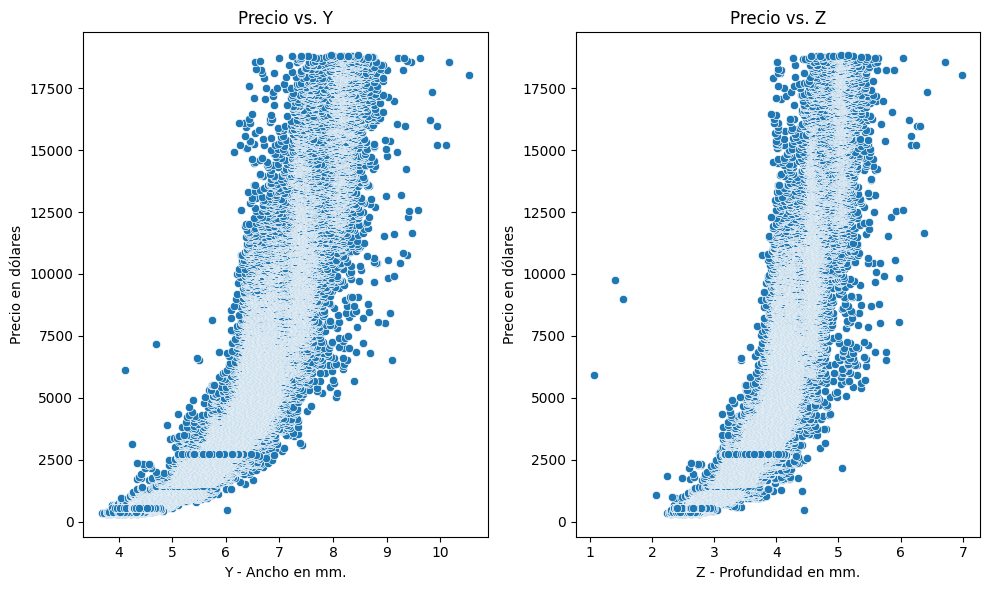

In [10]:
#Chequeamos las eliminaciones
f, axs = plt.subplots(1,2, figsize=(10, 6), gridspec_kw=dict(width_ratios=[5, 5]))
sns.scatterplot(data=df, x="y", y="price", ax=axs[0])
sns.scatterplot(data=df, x="z", y="price", ax=axs[1])
axs[0].set_title('Precio vs. Y')
axs[1].set_title('Precio vs. Z')
axs[0].set_xlabel('Y - Ancho en mm.')
axs[1].set_xlabel('Z - Profundidad en mm.')
axs[0].set_ylabel('Precio en dólares')
axs[1].set_ylabel('Precio en dólares')

f.tight_layout()

Se observa que quedan algunos valores de Z menores a 2, por ahora los conservamos.
Aprovechando que realizamos estas gráficas, podemos observar que el precio aumenta a medida que la gema es mas ancha y mas profunda, casi de una manera lineal hasta cierto límite de taaño (Y=5.5-6; z=3.5), pero a partir de esos valores el precio aumenta en mayor medida que el tamaño de la gema. Al parecer otras variables son de mayor importancia que las dimensiones de las mismas. Como por ejemplo, vimos en un gráfico anterior, la claridad de la gema, su corte o color.

####Retomando las hipótesis iniciales, que eran:
* El precio se encuentra determinado pricipalmente por el tamaño 'carat' de la gema y menos por la claridad de la misma. es decir por las dimensionas más que por un atributo de calidad.
* De las variables de calidad física, influye más en el precio la calidad del corte que el color de la gema.

Podemos decir que existe una relación entre el precio y el peso en quilates, y, que este último tiene relacion a su vez con el resto de las medidas físicas (ancho, alto y profundidad). Pero al contrario de lo esperado, la claridad de la gema si sería una variable involucrada en el precio de los diamantes, así como tambien el color de la gema (tal vez en menor medida), pero no así la calidad del corte.

#Machine learning
#Aprendizaje supervisado: Análisis de regresión

Luego de haber explorado los datos, vamos a evaluar la correlación entre mi variable target 'price' y uno de las variables independientes. Primero aproximaré un modelo más sencillo, univariado, para luego compararlo con otro más complejo.
Para este último se seleccionan más variables, que si bien algunas no presentan un alto grado de correlación podrían ser de utilidad. Además, no se tienen en cuenta otras variables muy correlacionadas entre si.

#**1) Regresión simple**

In [13]:
# Calcular el coeficiente de correlación entre X e Y
corr_coeff =df['carat'].corr(df['price'], method='pearson').round(3)

# Imprimir el coeficiente de correlación

print("Coeficiente de correlación de Pearson: ", corr_coeff)


Coeficiente de correlación de Pearson:  0.922


Observamos un coeficiente de variación de 0.92, por lo que sería lógico pensar en un modelo lineal como primera aproximación.

In [74]:
#Variable independiente o feature
X = df[['carat']]

#Variable dependiente o target
Y = df[['price']]

In [75]:
#librerias a utilizar
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

#seleccionamos una division 70/30 de los datos para entrenamiento y testeo respectivamente.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state=0)

#duda: dada la alta cantidad de registros, sería positivo utilizar otra division diferente a 70/30, dejando más datos para testeo?

In [76]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

# Obtener la pendiente y el intercepto
slope = lm.coef_
intercept = lm.intercept_

print("Valor de la pendiente:", slope.round(1))
print("Valor del intercepto:", intercept.round(1))

Valor de la pendiente: [[7746.1]]
Valor del intercepto: [-2245.]


La ecuacion de la recta quedaría conformada de la siguiente manera:

Y= 7746.1*X+(-2245)

(0.0, 20000.0)

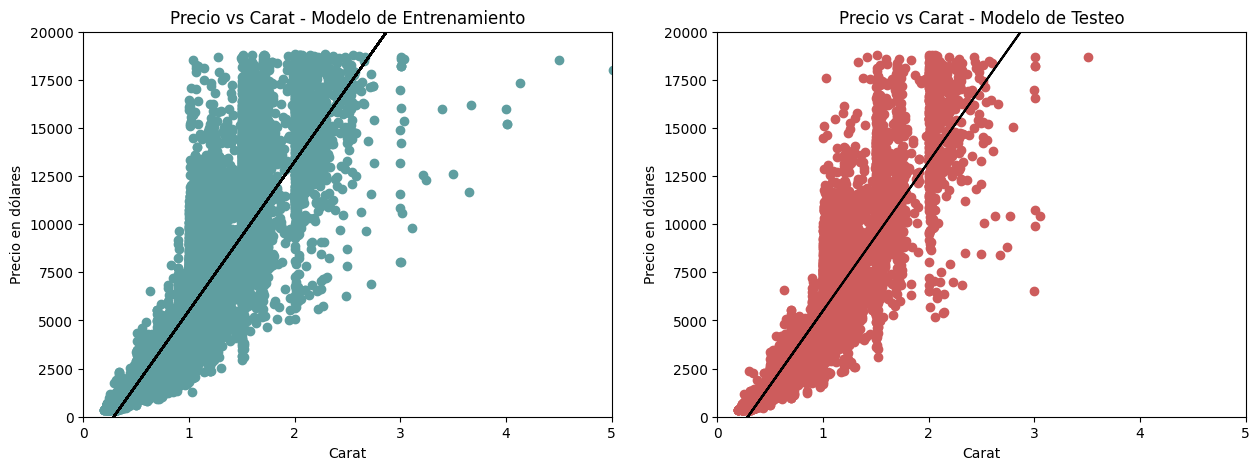

In [52]:
#Visualizamos como sería el modelo
fig, (ax1, ax2)=plt.subplots(nrows=1,ncols=2, figsize=[15,5])

#Visualización de los datos de entrenamiento
ax1.scatter(X_train, Y_train, color = 'cadetblue')
ax1.plot(X_train, lm.predict(X_train), color = 'black')
ax1.set_title('Precio vs Carat - Modelo de Entrenamiento')
ax1.set_xlabel('Carat')
ax1.set_ylabel('Precio en dólares')
ax1.set_xlim(0,5)
ax1.set_ylim(0,20000)

#Visualización de los datos de prueba
ax2.scatter(X_test, Y_test, color = 'indianred')
ax2.plot(X_test, lm.predict(X_test), color = 'black')
ax2.set_title('Precio vs Carat - Modelo de Testeo')
ax2.set_xlabel('Carat')
ax2.set_ylabel('Precio en dólares')
ax2.set_xlim(0,5)
ax2.set_ylim(0,20000)

(0.0, 20000.0)

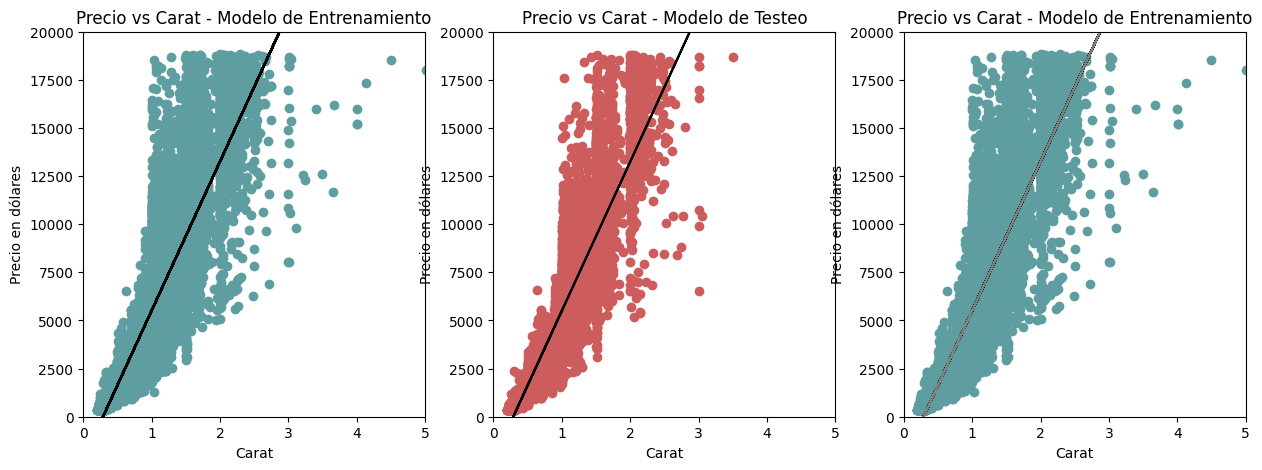

In [53]:
#### DUDA: si ploteo estas lineas en el mismo gráfico, se superponen. No termino de entender porque es la misma linea con datos de entrenamiento o testeo. Será porque el modelo presenta overfitting?
#ax1.plot(X_train, regressor.predict(X_train), color = 'black')
#ax2.plot(X_test, regressor.predict(X_test), color = 'black')
fig, (ax1, ax2, ax3)=plt.subplots(nrows=1,ncols=3, figsize=[15,5])

#Visualización de los datos de entrenamiento
ax1.scatter(X_train, Y_train, color = 'cadetblue')
ax1.plot(X_train, lm.predict(X_train), color = 'black')
ax1.set_title('Precio vs Carat - Modelo de Entrenamiento')
ax1.set_xlabel('Carat')
ax1.set_ylabel('Precio en dólares')
ax1.set_xlim(0,5)
ax1.set_ylim(0,20000)

#Visualización de los datos de prueba
ax2.scatter(X_test, Y_test, color = 'indianred')
ax2.plot(X_test, lm.predict(X_test), color = 'black')
ax2.set_title('Precio vs Carat - Modelo de Testeo')
ax2.set_xlabel('Carat')
ax2.set_ylabel('Precio en dólares')
ax2.set_xlim(0,5)
ax2.set_ylim(0,20000)


ax3.scatter(X_train, Y_train, color = 'cadetblue')
ax3.plot(X_train, lm.predict(X_train), color = 'black')
ax3.plot(X_test, lm.predict(X_test), color = 'grey')
ax3.set_title('Precio vs Carat - Modelo de Entrenamiento')
ax3.set_xlabel('Carat')
ax3.set_ylabel('Precio en dólares')
ax3.set_xlim(0,5)
ax3.set_ylim(0,20000)

A continuación calcularemos algunas métricas para evaluar el funcionamiento del modelo

In [65]:
#Score del modelo en entrenamiento
train_score= lm.score(X_train, Y_train)

#Score del modelo en testeo
test_score= lm.score(X_test, Y_test)

print("Coef. determinación en entrenamiento:", train_score.round(3))
print("Coef. determinación en testeo:", test_score.round(3))

Coef. determinación en entrenamiento: 0.848
Coef. determinación en testeo: 0.852


El modelo parecería tener una muy buena capacidad predictiva.

Ahora testeamos el modelo y predecimos sobre datos nuevos. Como vimos en clase, una interfaz para uso comercial sería:

In [78]:
2#Ingresar el peso de la gema
Carat = float(input('Peso en quilates:'))

#La predicción del precio en dólares seria:
Price = lm.predict([[Carat]])
Price = int(Price)
print("El precio en dólares estimado sería de USD:",Price)

Peso en quilates:2
El precio en dólares estimado sería de USD: 13247


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-input-78-2f796bf48cfd>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Price = int(Price)


In [79]:
#Valores predichos por el modelo
Y_pred = lm.predict(X_test)

In [80]:
#Evaluamos los diferentes errores.
#Para testeo y entrenamiento

from sklearn.metrics import mean_absolute_error
Y_pred_train=lm.predict(X_train)
print("MAE para testeo es:",mean_absolute_error(Y_test,Y_pred))
print("MAE para entrenamiento es:",mean_absolute_error(Y_train,Y_pred_train))

MAE para testeo es: 1003.296086649738
MAE para entrenamiento es: 1007.2190871167505


Existe la posibilidad que este teniendo un overfitting, dado el valor del error para el conjunto de entrenamiento.

In [71]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(Y_test,Y_pred))

MSE 2327490.9691624595


In [72]:
print("RMSE",np.sqrt(mean_squared_error(Y_test,Y_pred)))

RMSE 1525.611670498905


In [88]:
from sklearn.metrics import r2_score
print("R2 para testeo:",r2_score(Y_test,Y_pred))
print("R2 para entrenamiento:",r2_score(Y_train,Y_pred_train))

R2 para testeo: 0.8516149476471534
R2 para entrenamiento: 0.8483495196842832


Si bien los errores MAE y RMSE arrojaron valores que consideraría bastante altos, el R2 presenta valores óptimos.

#**2) Regresión múltiple**
Probamos un nuevo modelo de regresión múltiple con el resto de las variables, sin incluir las dimensiones ('x','y','z') dada su alta correlación entre si y con carat.

In [192]:
#codificamos las variables que son categóricas
from sklearn.preprocessing import OrdinalEncoder
df2=df[['carat','depth','table']]
df_ordinal=df[['cut','clarity','color']]
enc = OrdinalEncoder(categories = [['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
                                  ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'],
                                  ['D','E','F','G','H','I','J']])
df_ordinal_cod=enc.fit_transform(df_ordinal)
df_ordinal = pd.DataFrame(df_ordinal_cod,columns=['cut','clarity','color'])
df_final = pd.concat([df2.reset_index(drop="true"),df_ordinal.reset_index(drop="true")],axis=1)
df_final=pd.DataFrame(df_final)

In [202]:
df_final.shape

(53917, 6)

In [203]:
#definimos nuevamente nuestras variables
#Variable independiente o feature
X = df_final[['carat','depth','table','color','cut','clarity']]

#Variable dependiente o target
Y = df[['price']]

#seleccionamos una division 70/30 de los datos para entrenamiento y testeo respectivamente.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state=0)

#estandarizamos las variables dada las diferencias en unidades de las variables

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [204]:
#Ajustamos el modelo lineal
lm2 = LinearRegression()
lm2.fit(X_train, Y_train)

LinearRegression()

In [205]:
#Score del modelo en entrenamiento
train_score= lm2.score(X_train, Y_train)

#Score del modelo en testeo
test_score= lm2.score(X_test, Y_test)

print("Coef. determinación en entrenamiento:", train_score.round(3))
print("Coef. determinación en testeo:", test_score.round(3))

Coef. determinación en entrenamiento: 0.903
Coef. determinación en testeo: 0.907


In [211]:
#Valores predichos por el modelo
Y_pred_lm2 = lm2.predict(X_test)

In [212]:
#Evaluamos los diferentes errores.
#Para testeo y entrenamiento
Y_pred_train=lm2.predict(X_train)
print("MAE para testeo es:",mean_absolute_error(Y_test,Y_pred_lm2))
print("MAE para entrenamiento es:",mean_absolute_error(Y_train,Y_pred_train))
print("MSE para testeo",mean_squared_error(Y_test,Y_pred_lm2))
print("RMSE para testeo",np.sqrt(mean_squared_error(Y_test,Y_pred_lm2)))
print("R2 para testeo:",r2_score(Y_test,Y_pred_lm2))
print("R2 para entrenamiento:",r2_score(Y_train,Y_pred_train))

MAE para testeo es: 849.6095596596534
MAE para entrenamiento es: 856.0092600910067
MSE para testeo 1466047.260411784
RMSE para testeo 1210.8043856923314
R2 para testeo: 0.9065347610924432
R2 para entrenamiento: 0.903440701911586


#Conclusiones
En este proyecto se ejecutó y evaluó el desempeño de dos modelos de aprendije supervisado correspondientes mediante métodos de regresión lineal.

El primer modelo, correspondiente a una regresión simple, arrojó buenos valores del coeficiente de determinacíon, indicando que gran parte de la variabilidad de los datos estaría siendo explicada por el modelo. A pesar de esto, los valores de los otros errores, fueron un poco altos. Incluso, dado los valores para el conjunto de entrenamiento indicarían tal vez que el modelo presenta overfitting.
A continuación se realizó una regresión múltiple, la cual mejoró todos los valores presentados por el primer modelo.

Entonces, parecería mejor al momento de estimar el precio en dólares de una gema, contar no solo con su peso en quilates, sino con otras de sus características fisicas. Sin embargo, queda por responder si este último modelo no estaría sobre ajustado también, dado que contiene 6 variables (si bien no serían muchas para la cantidad de registros del dataset). Quedaría tal vez por probar algún otro modelo diferente que tenga en cuenta relaciones más específicas como vimos en la exploración de los datos, como la influencia de la claridad del corte (gráfico: 'Carat vs. Precio según claridad del corte'). Así como también aplicar algún método de selección de modelo para encontrar el más parsimonioso.